# Clasificación

Predicción de respuestas cualitaticas (variables categóricas). Técnicas de clasificación se les denomica $ \bf{clasificadores} $.


Un conjuntos de $ n $ observaciones (conjuto de entrenamiento) $ \begin{Bmatrix} (x_1, y_1) , (x_2, y_2), \cdots (x_n, y_n) \end{Bmatrix} $. 

### Por qué no usar una regresión lineal para una respuesta cualitativa?

- No hay una forma natural de convertir una variable de respuesta cualitativa con más de dos niveles en una respuesta cuantitativa.
- Una regresión lineal no proporciona una estimación significativa del calculo de la $ P(Y | X) $.


### Regresión logística

- Se usa para una respuesta cualitativa binaria.
- Se modela la probabilidad que $ Y $ pertenezca a una categoría en particular.

#### Modelo logístico

$$ p(\bf{X}) = \frac{e^{\beta_0 + \beta_1\bf{X}}}{1 + e^{\beta_0 + \beta_1 \bf{X}}} =  \frac{1}{1 + e^{-(\beta_0 + \beta_1 \bf{X})}}$$

- Se ajusta a través del método máximo verosimilitud.


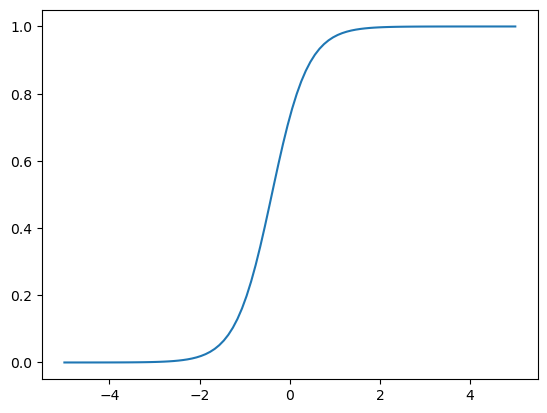

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;

x = np.linspace(-5, 5, 100)
beta_0, beta_1 = 1, 2.5;
linear_model = beta_0 + beta_1 * x;
y = (np.exp(linear_model))/(1 + np.exp(linear_model))

fig, ax = plt.subplots()

ax.plot(x, y)


$$ \frac{p(\bf{X})}{1 - p(\bf{X})} = e^{\beta_0 + \beta_1\bf{X}} $$


### Estimación de los coeficiente de la regresión

Coeficiente $ \beta_0 $ y $ \beta_1 $ son desconocidos. El método más utilizado es el máxima verosimilitud (tiene mejores propiedades estadísticas comparado con el mínimos cuadrados).

#### Función de verosimilitud

$$ L(\beta_0, \beta_1) = \prod_{i:y_i = 1} p(x_i) \prod_{{i}':y_{{i}'} = 0} 1 - p(x_{{i}'}) $$

- $ \beta_0 $ y $ \beta_1 $ se seleccionan para maximizar la función de verosimilitud.


$$ L(\beta_0, \beta_1) = \prod_{i} p(x_i)^{y_i} (1 - p(x_i))^{1-y_i} $$
$$ l(\beta_0, \beta_1) = \sum_{i}^{n} y_i * ln(p(x_i)) + (1-y_i) * ln(1 - p(x_i)) $$
$$ l(\beta_0, \beta_1) = \sum_{i}^{n} y_i * ln \left (\frac{1}{1 + e^{-(\beta_0 + \beta_1 \bf{x_i})}} \right ) + (1-y_i) * ln \left(\frac{e^{-(\beta_0 + \beta_1 \bf{x_i})}}{1 + e^{-(\beta_0 + \beta_1 \bf{x_i})}}\right) $$

$$ l(\beta_0, \beta_1) = \sum_{i}^{n} y_i * (\beta_0 + \beta_1 x_i)  - ln(1 + e^{(\beta_0 + \beta_1 \bf{x_i})})$$

### Problema de maximización

$$ \beta^* = arg\ \underset{\bf{\beta}}{max} \ l(\beta_0, \beta_1)  $$

No se encuentra una solución análitica, por lo tanto, se usa un método numérico.


### Encontrando las derivadas

A través de Newton-Raphson se puede encontrar una solución.

- Gradiente
$$ \nabla l(\beta_0, \beta_1) = \sum^{n}_{i=1} \left [ y_i - p(x_i)\right]x_i $$

- Matriz Hessiana
$$ \nabla^2 l(\beta_0, \beta_1) = - \sum_{i}^{n} p(x_i)(1- p(x_i)) x_i^T x_i $$

#### Representación matricial de las derivadas


- Gradiente
$$ \nabla l(\beta_0, \beta_1) = \sum^{n}_{i=1} \left [ y_i - p(x_i)\right]x_i  = \bf{X}^T (\bf{Y} - \bf{\hat{Y}})$$

- Matriz Hessiana
$$ \nabla^2 l(\beta_0, \beta_1) = - \sum_{i}^{n} p(x_i)(1- p(x_i)) x_i^T x_i = - \bf{X}^T \bf{P} (1- \bf{P}) \bf{X}  = - \bf{X}^T \bf{W} \bf{X} $$

#### Proceso iterativo

$$ \bf{\beta^{t+1}} = \bf{\beta^{t}} + (\bf{X}^T \bf{W}^{t} \bf{X})^{-1} \bf{X}^T (\bf{Y} - \bf{\hat{Y}}^{t})$$

### Regresión logística múltiple

Predecir una respuesta binaria usando múltiples predictores.

$$ log \left( \frac{p(\bf{X})}{1 - p(\bf{X})} \right ) = \beta_0 + \beta_1\bf{X} + \cdots + \beta_p \bf{X_p} $$

- El número de predictores utilizado puede generar diferentes resultados, especialmente cuando existe correlación entre los predictores (Confuso).

### Regresión logística multinomial

Clasificación de una respuesta cualitivo de más de dos 2 clases.

$$ P(Y = k| X = x) =  \frac{e^{\beta_{k0} + \beta_{k1}\bf{X} + \cdots + \beta_{kp} \bf{X_p}}}{1 + \sum_{l=1}^{K-1} e^{\beta_{l0} + \beta_{l1}\bf{X} + \cdots + \beta_{lp} \bf{X_p}}}



